In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the Exce file contating Yearly HeadCount data
df = pd.read_excel(r"Yearly Headcount.xlsx", sheet_name="Sheet1") 

Raw Data:
   Year  Grand Total
0  2020        35937
1  2021        50319
2  2022        67315
3  2023        91153


/home/kali/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


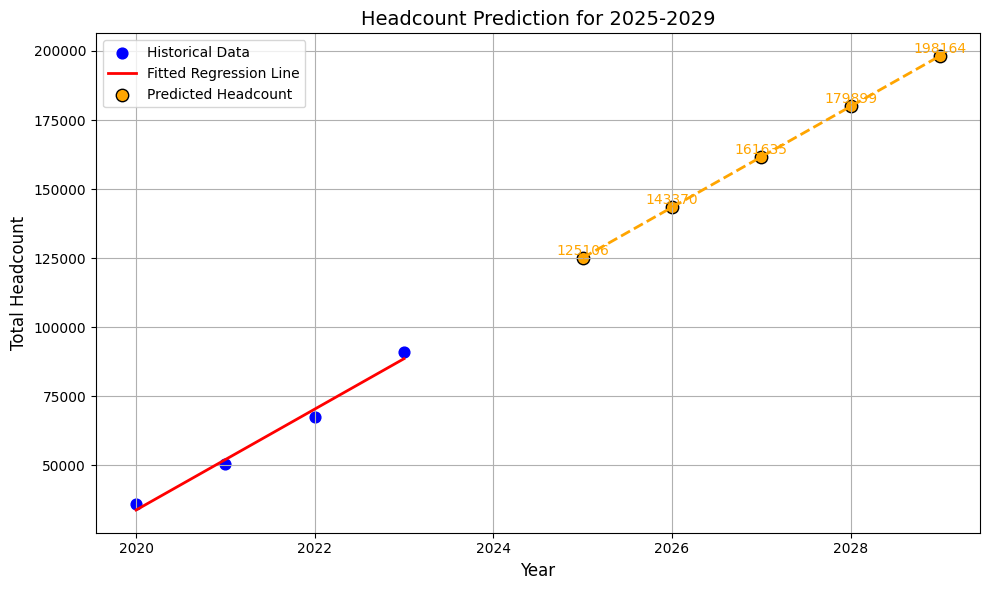

Forecasted Headcounts for 2025-2029:
   Year  Predicted Headcount
0  2025             125106.4
1  2026             143370.8
2  2027             161635.2
3  2028             179899.6
4  2029             198164.0
Predicted results saved to 'Linear_Regression_Headcount_Predictions_2025_2029.csv'


In [3]:
# Display the first few rows of the dataset to confirm the structure
print("Raw Data:")
print(df.head())

# Convert the 'Year' column to numeric format for regression
df['Year'] = pd.to_numeric(df['Year'])  # Ensure years are treated as numbers
X = df[['Year']]  # Independent variable (Year)
y =df['Grand Total']  # Dependent variable (Total Headcount)

# Initialize and train the Linear Regression model using historical data
model = LinearRegression()
model.fit(X, y)

# Predict future headcounts for the years 2025–2029
future_years = np.array([2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)  # Future years
future_predictions = model.predict(future_years)  # Predictions using the trained model

# Plot historical data and the regression line
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
plt.scatter(X, y, color='blue', label='Historical Data', s=60)  # Actual headcount data
plt.plot(X, model.predict(X), color='red', label='Fitted Regression Line', linewidth=2)  # Regression line

# Highlight the predicted headcounts for the next 5 years
plt.scatter(future_years, future_predictions, color='orange', label='Predicted Headcount', s=80, edgecolor='black')
plt.plot(future_years, future_predictions, color='orange', linestyle='--', linewidth=2)  # Dashed line for predictions

# Add text annotations to highlight predictions
for year, prediction in zip(future_years.flatten(), future_predictions):
    plt.text(year, prediction, f'{int(prediction)}', fontsize=10, ha='center', va='bottom', color='orange')

# Customize the plot appearance
plt.title('Headcount Prediction for 2025-2029', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Headcount', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

# Create a DataFrame for the predicted values and display them
predicted_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Headcount': future_predictions
})
print("Forecasted Headcounts for 2025-2029:")
print(predicted_df)

# Save the forecasted predictions to a CSV file for further use
predicted_df.to_csv('Linear_Regression_Headcount_Predictions_2025_2029.csv', index=False)
print("Predicted results saved to 'Linear_Regression_Headcount_Predictions_2025_2029.csv'")
